In [29]:
!pip install mlflow

In [32]:
mlflow.set_experiment("classiffication with mlflow")
mlflow.start_run(run_name = " LogisticRegression experiment")

<ActiveRun: >

**Import libraries**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import mlflow

**Load the dataset**

In [4]:
data = pd.read_csv('/content/Training.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27,0
2456,4,123,62,0,0,32.0,0.226,35,1
2457,1,80,74,11,60,30.0,0.527,22,0
2458,1,96,64,27,87,33.2,0.289,21,0


**Check for the mising values**

All the values ​​in my dataset are numerical values, so I do not need preprocessing (cleaning) because there are also no nulls.

In [5]:
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000,2460.000000
mean,3.817480,121.602033,68.915041,20.531301,80.119919,31.990447,0.491440,32.821951,0.390244
std,3.296458,31.789270,19.082655,15.716901,116.765807,7.802569,0.363917,11.251208,0.487904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.100000,0.251750,24.000000,0.000000
50%,3.000000,117.000000,70.000000,23.000000,36.000000,32.100000,0.381000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,129.000000,36.500000,0.647000,39.000000,1.000000
max,17.000000,197.000000,122.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Scaling**

In [8]:
scaler = StandardScaler()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
data_scaled = scaler.fit_transform(data[features])

**Split data (Features and labels)**
- All columns except label column save in X
- label column save in y

In [9]:
x = data.drop(columns='Outcome')
y = data['Outcome']

In [10]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
2455,3,126,88,41,235,39.3,0.704,27
2456,4,123,62,0,0,32.0,0.226,35
2457,1,80,74,11,60,30.0,0.527,22
2458,1,96,64,27,87,33.2,0.289,21


In [11]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
2455,0
2456,1
2457,0
2458,0


**Split data (training and testing)**
- x_train = training data for features
- x_test = testing data for features
- y_train = training data for labels
- y_test = testing data for labels

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=42)

**Modeling**
- LogisticRegression model

In [13]:
model = LogisticRegression()

# train the model
model.fit(x_train, y_train)

# test the model
y_pred = model.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
model

LogisticRegression()

In [33]:
mlflow.sklearn.log_model(model, "trained_LogisticRegression_model")

2025/01/04 20:58:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Evaluate the model**


In [15]:
accuracy = accuracy_score(y_test, y_pred)

In [16]:
accuracy

0.7296747967479674

In [17]:
cm = confusion_matrix(y_test, y_pred)

In [18]:
cm

array([[263,  42],
       [ 91,  96]])

In [19]:
report = classification_report(y_test, y_pred)

In [20]:
report

'              precision    recall  f1-score   support\n\n           0       0.74      0.86      0.80       305\n           1       0.70      0.51      0.59       187\n\n    accuracy                           0.73       492\n   macro avg       0.72      0.69      0.69       492\nweighted avg       0.72      0.73      0.72       492\n'

In [34]:
mlflow.log_metric("accuracy", accuracy)
mlflow.log_metric("true_negatives", cm[0, 0])
mlflow.log_metric("false_positives", cm[0, 1])
mlflow.log_metric("false_negatives", cm[1, 0])
mlflow.log_metric("true_positives", cm[1, 1])
mlflow.log_text(report, "classification_report.txt")

**Visualize the results**

In [21]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

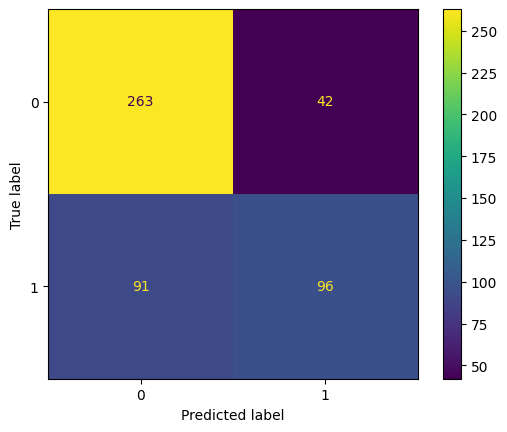

In [22]:
disp.plot()
plt.show()

In [28]:
mlflow.end_run()

In [35]:
uri = f"runs:/{mlflow.active_run().info.run_id}/trained_LogisticRegression_model"
mlflow_loaded_model= mlflow.sklearn.load_model(uri)

In [37]:
test_data ={
    "Pregnancies": 6,
    "Glucose": 148,
    "BloodPressure": 72,
    "SkinThickness": 35,
    "Insulin": 0,
    "BMI": 33.6,
    "DiabetesPedigreeFunction": 2460,
    "Age": 20}


test_df = pd.DataFrame([test_data])
scaled_test_df = scaler.transform(test_df)

new_prediction = mlflow_loaded_model.predict(scaled_test_df)
print(new_prediction[0])

1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
